In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [180]:
train=pd.read_excel(r'D:\Data_Train.xlsx')
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [181]:
train.shape

(10683, 11)

In [182]:
test=pd.read_excel(r'D:\Test_set.xlsx')
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [183]:
test.shape

(2671, 10)

In [184]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [185]:
train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [186]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

<AxesSubplot:>

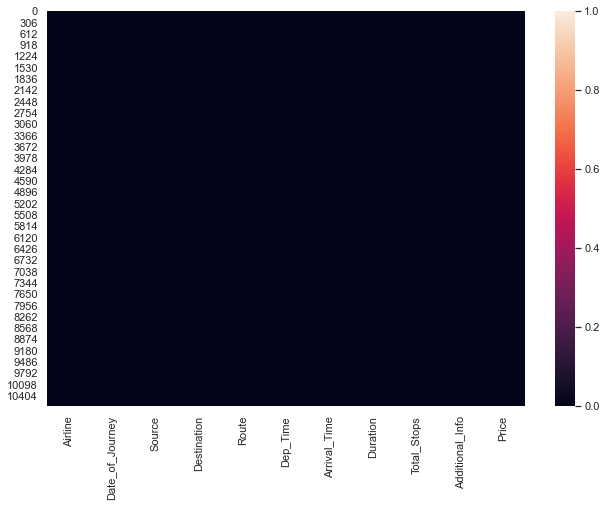

In [187]:
sns.heatmap(train.isnull())

# Fiiling The Missing Values in Train Data

In [188]:
train['Route']=train['Route'].fillna(0)
train['Total_Stops']=train['Total_Stops'].fillna(0)

<AxesSubplot:>

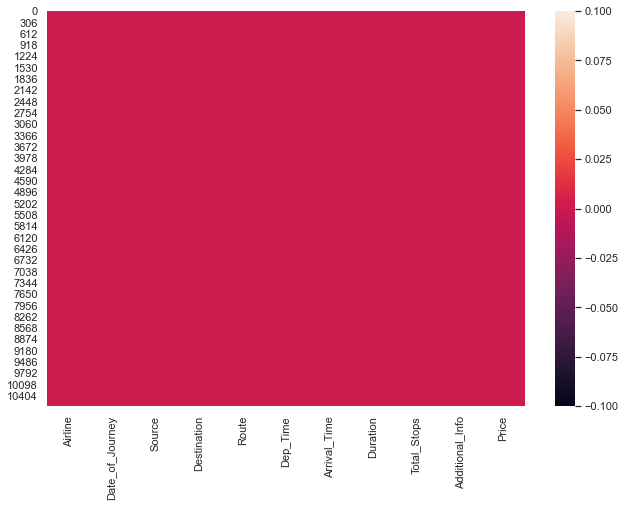

In [189]:
sns.heatmap(train.isnull())

In [190]:
train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='count'>

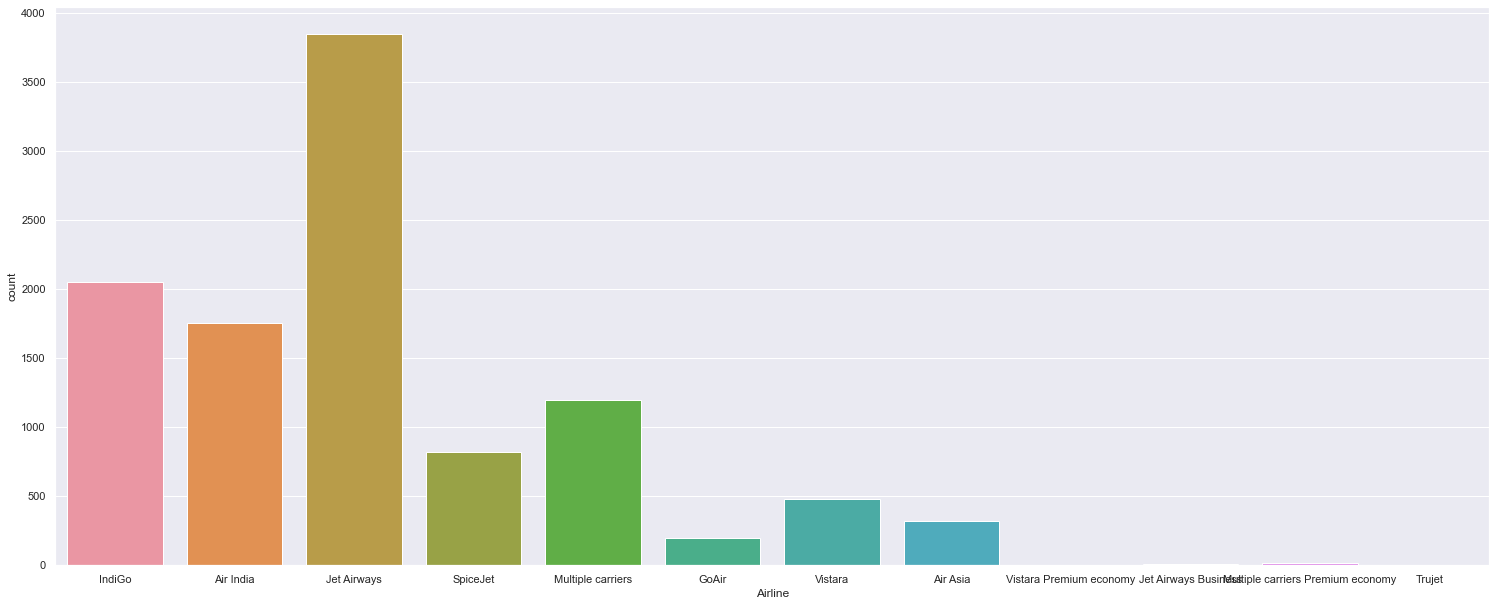

In [191]:
#Analysis of the various airlines 
sns.set(rc={'figure.figsize':(25.7,10.27)})
sns.countplot(train['Airline'])

As shown in the above plot, Jet-Airways Travelled more in numbers in compare to other flights

In [192]:
train['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [193]:
pd.crosstab(train['Source'],train['Destination'])

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,0,0,1265,0,0,932
Chennai,0,0,0,0,381,0
Delhi,0,4537,0,0,0,0
Kolkata,2871,0,0,0,0,0
Mumbai,0,0,0,697,0,0


As you can see that more number of flights is between delhi to cochi. So this may be the busiest rout

In [194]:
#row of the entire dataset where the price is maximum
train.loc[train['Price'].idxmax()]

Airline            Jet Airways Business
Date_of_Journey              01/03/2019
Source                         Banglore
Destination                   New Delhi
Route                   BLR → BOM → DEL
Dep_Time                          05:45
Arrival_Time                      11:25
Duration                         5h 40m
Total_Stops                      1 stop
Additional_Info          Business class
Price                             79512
Name: 2924, dtype: object

In [195]:
#row of the entire dataset where the price is miniimum
train.loc[train['Price'].idxmin()]

Airline                SpiceJet
Date_of_Journey      21/03/2019
Source                   Mumbai
Destination           Hyderabad
Route                 BOM → HYD
Dep_Time                  22:45
Arrival_Time       00:10 22 Mar
Duration                 1h 25m
Total_Stops            non-stop
Additional_Info         No info
Price                      1759
Name: 4066, dtype: object

In [196]:
train['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

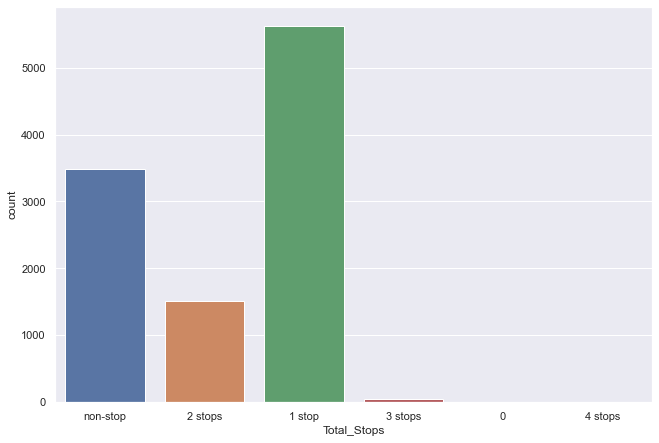

In [197]:
sns.set(rc={'figure.figsize':(10.7,7.27)})
sns.countplot(train['Total_Stops'])

There are more flights which have more stops

In [198]:
#stats of airlines with total stops
pd.crosstab(train['Airline'],train['Total_Stops'])

Total_Stops,0,1 stop,2 stops,3 stops,4 stops,non-stop
Airline,,,,,,
Air Asia,0,129,9,0,0,181
Air India,1,540,756,37,1,417
GoAir,0,102,0,0,0,92
IndiGo,0,793,19,0,0,1241
Jet Airways,0,2535,691,0,0,623
Jet Airways Business,0,4,2,0,0,0
Multiple carriers,0,1145,43,8,0,0
Multiple carriers Premium economy,0,13,0,0,0,0
SpiceJet,0,148,0,0,0,670


# Feature engineering

In [199]:
train["Date_of_Journey"]=pd.to_datetime(train['Date_of_Journey'])
train['Month_of_Journey'] = train['Date_of_Journey'].dt.month
train['Day_of_Journey'] = train['Date_of_Journey'].dt.day

In [200]:
train['Month_of_Journey'].value_counts()

6     2536
3     2211
5     2074
9     1406
1     1075
12     957
4      424
Name: Month_of_Journey, dtype: int64

In [201]:
#extracting the month from the flight date
test['Date_of_Journey'] = pd.to_datetime(test['Date_of_Journey'])
test['Month_of_Journey'] = test['Date_of_Journey'].dt.month
test['Day_of_Journey'] = test['Date_of_Journey'].dt.day

In [202]:
test["Day_of_Journey"].value_counts()

6     561
3     378
5     374
15    267
21    257
24    255
27    220
18    204
4     155
Name: Day_of_Journey, dtype: int64

In [203]:
train.dtypes

Airline                     object
Date_of_Journey     datetime64[ns]
Source                      object
Destination                 object
Route                       object
Dep_Time                    object
Arrival_Time                object
Duration                    object
Total_Stops                 object
Additional_Info             object
Price                        int64
Month_of_Journey             int64
Day_of_Journey               int64
dtype: object

In [204]:
#droping the dat_of_journey column in train dataset
train.drop(['Date_of_Journey'],axis=1,inplace=True)

In [205]:
#droping the duration column in test dataset
test = test.drop(['Date_of_Journey'],axis=1)

In [206]:
test.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Month_of_Journey,Day_of_Journey
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,5,21
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,5,21
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,6,24


In [207]:
# Departure time is when a plane leaves the gate.
# Similar to the Date_of_Journey we can extract values from Dep_Time

#Extracting Hours 
train["Dep_hour"] = pd.to_datetime(train["Dep_Time"]).dt.hour

# Extracting Minutes 
train["Dep_min"] = pd.to_datetime(train["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it of no use
train.drop(["Dep_Time"], axis = 1, inplace = True)

In [208]:
# Arrival time is when the plane pulls up to the gate 
# Similar to Date_of_Journey we can extract values from Arrival_Time

#Extracting Hours 
train["Arrival_hour"] = pd.to_datetime(train["Arrival_Time"]).dt.hour

# Extracting Minutes 
train["Arrival_min"] = pd.to_datetime(train["Arrival_Time"]).dt.minute

# Now we can drop Dep_Time as it of no use
train.drop(["Arrival_Time"], axis = 1, inplace = True)

In [209]:
train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Month_of_Journey,Day_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [210]:
# Departure time is when a plane leaves the gate.
# Similar to the Date_of_Journey we can extract values from Dep_Time

#Extracting Hours 
test["Dep_hour"] = pd.to_datetime(test["Dep_Time"]).dt.hour

# Extracting Minutes 
test["Dep_min"] = pd.to_datetime(test["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it of no use
test.drop(["Dep_Time"], axis = 1, inplace = True)

In [211]:
# Arrival time is when the plane pulls up to the gate 
# Similar to Date_of_Journey we can extract values from Arrival_Time

#Extracting Hours 
test["Arrival_hour"] = pd.to_datetime(test["Arrival_Time"]).dt.hour

# Extracting Minutes 
test["Arrival_min"] = pd.to_datetime(test["Arrival_Time"]).dt.minute

# Now we can drop Dep_Time as it of no use
test.drop(["Arrival_Time"], axis = 1, inplace = True)

In [212]:
#Duration

train['Duration_hour']=train['Duration'].str.split('h').str[0]

train['Duration_hour'].value_counts()

2     2402
1      621
3      501
7      487
5      481
9      445
12     428
8      424
13     407
11     365
10     355
6      340
14     337
15     268
23     265
26     241
16     234
4      222
22     218
24     197
21     196
25     186
27     179
20     162
18     141
19     134
17     129
28      94
29      65
30      49
38      34
37      17
33      13
32       9
34       8
36       7
35       7
31       6
39       2
47       2
42       2
41       1
5m       1
40       1
Name: Duration_hour, dtype: int64

In [213]:
def change(data):
    if data=='5m':
        x='0'
    else:
        x=data
    return x

train['Duration_hour']=train['Duration_hour'].apply(lambda x:change(x))

In [214]:
train['Duration']=train['Duration'].str.split(' ').str[1]

train['Duration_minute']=train['Duration'].str.split('m').str[0]

train['Duration_minute'].fillna('0',inplace=True)

train.drop(['Duration'],axis=1,inplace=True)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10683 non-null  object
 1   Source            10683 non-null  object
 2   Destination       10683 non-null  object
 3   Route             10683 non-null  object
 4   Total_Stops       10683 non-null  object
 5   Additional_Info   10683 non-null  object
 6   Price             10683 non-null  int64 
 7   Month_of_Journey  10683 non-null  int64 
 8   Day_of_Journey    10683 non-null  int64 
 9   Dep_hour          10683 non-null  int64 
 10  Dep_min           10683 non-null  int64 
 11  Arrival_hour      10683 non-null  int64 
 12  Arrival_min       10683 non-null  int64 
 13  Duration_hour     10683 non-null  object
 14  Duration_minute   10683 non-null  object
dtypes: int64(7), object(8)
memory usage: 1.2+ MB


In [215]:
train.shape

(10683, 15)

In [216]:
train['Route'].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BOM → BLR → CCU → BBI → HYD       1
BLR → HBX → BOM → BHO → DEL       1
BOM → RPR → VTZ → HYD             1
BOM → BBI → HYD                   1
0                                 1
Name: Route, Length: 129, dtype: int64

In [217]:
train['Route_1']=train['Route'].str.split('→ ').str[0]

train['Route_2']=train['Route'].str.split('→ ').str[1]

train['Route_3']=train['Route'].str.split('→ ').str[2]

train['Route_4']=train['Route'].str.split('→ ').str[3]

train['Route_5']=train['Route'].str.split('→ ').str[4]

train['Route_6']=train['Route'].str.split('→ ').str[5]

train.drop(['Route'],axis=1,inplace=True)

In [218]:
train['Route_1'].fillna('None',inplace=True)
train['Route_2'].fillna('None',inplace=True)
train['Route_3'].fillna('None',inplace=True)
train['Route_4'].fillna('None',inplace=True)
train['Route_5'].fillna('None',inplace=True)
train['Route_6'].fillna('None',inplace=True)

In [219]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train['Route_1']=le.fit_transform(train['Route_1'])
train['Route_2']=le.fit_transform(train['Route_2'])
train['Route_3']=le.fit_transform(train['Route_3'])
train['Route_4']=le.fit_transform(train['Route_4'])
train['Route_5']=le.fit_transform(train['Route_5'])
train['Route_6']=le.fit_transform(train['Route_6'])

In [220]:
train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
0              1
Name: Total_Stops, dtype: int64

In [221]:
train['Total_Stops'].replace(['non-stop'],['0 stop'],inplace=True)
train['Total_Stops'].value_counts()

1 stop     5625
0 stop     3491
2 stops    1520
3 stops      45
4 stops       1
0             1
Name: Total_Stops, dtype: int64

In [222]:
train['Stops']=train['Total_Stops'].str.split(' ').str[0]

In [223]:
train['Stops'].fillna('0',inplace=True)

In [224]:
train['Stops']=train['Stops'].astype(int)

train.drop(['Total_Stops'],axis=1,inplace=True)

In [225]:
train['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [226]:
train['Source']=le.fit_transform(train['Source'])

In [227]:
train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [228]:
train['Airline']=le.fit_transform(train['Airline'])

In [229]:
train['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [230]:
train['Additional_Info']=le.fit_transform(train['Additional_Info'])

In [231]:
train['Destination'].value_counts()
train['Destination']=le.fit_transform(train['Destination'])

In [232]:
train.head()

,Airline,Source,Destination,Additional_Info,Price,Month_of_Journey,Day_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_minute,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6,Stops
0,3,0,5,8,3897,3,24,22,20,1,10,2,50,0,13,24,12,4,1,0
1,1,3,0,8,7662,1,5,5,50,13,15,7,25,2,25,1,3,4,1,2
2,4,2,1,8,13882,9,6,9,25,4,25,19,0,3,32,4,5,4,1,2
3,3,3,0,8,6218,12,5,18,5,23,30,5,25,2,34,3,12,4,1,1
4,3,0,5,8,13302,1,3,16,50,21,35,4,45,0,34,8,12,4,1,1


In [233]:
#Duration

test['Duration_hour']=test['Duration'].str.split('h').str[0]

test['Duration_hour'].value_counts()

2     565
1     164
5     127
3     126
7     113
12    110
13    109
8     107
9     106
10    104
11    102
6     102
14     87
15     71
23     66
4      56
22     55
16     52
26     51
25     45
27     43
24     43
20     41
21     41
18     38
19     34
17     32
28     22
30     12
29     11
33      8
38      7
37      5
36      4
32      3
35      3
31      2
5m      1
39      1
40      1
34      1
Name: Duration_hour, dtype: int64

In [234]:
def change(data):
    if data=='5m':
        x='0'
    else:
        x=data
    return x

test['Duration_hour']=test['Duration_hour'].apply(lambda x:change(x))

In [235]:
test['Duration']=test['Duration'].str.split(' ').str[1]

test['Duration_minute']=test['Duration'].str.split('m').str[0]

test['Duration_minute'].fillna('0',inplace=True)

test.drop(['Duration'],axis=1,inplace=True)

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           2671 non-null   object
 1   Source            2671 non-null   object
 2   Destination       2671 non-null   object
 3   Route             2671 non-null   object
 4   Total_Stops       2671 non-null   object
 5   Additional_Info   2671 non-null   object
 6   Month_of_Journey  2671 non-null   int64 
 7   Day_of_Journey    2671 non-null   int64 
 8   Dep_hour          2671 non-null   int64 
 9   Dep_min           2671 non-null   int64 
 10  Arrival_hour      2671 non-null   int64 
 11  Arrival_min       2671 non-null   int64 
 12  Duration_hour     2671 non-null   object
 13  Duration_minute   2671 non-null   object
dtypes: int64(6), object(8)
memory usage: 292.3+ KB


In [236]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           2671 non-null   object
 1   Source            2671 non-null   object
 2   Destination       2671 non-null   object
 3   Route             2671 non-null   object
 4   Total_Stops       2671 non-null   object
 5   Additional_Info   2671 non-null   object
 6   Month_of_Journey  2671 non-null   int64 
 7   Day_of_Journey    2671 non-null   int64 
 8   Dep_hour          2671 non-null   int64 
 9   Dep_min           2671 non-null   int64 
 10  Arrival_hour      2671 non-null   int64 
 11  Arrival_min       2671 non-null   int64 
 12  Duration_hour     2671 non-null   object
 13  Duration_minute   2671 non-null   object
dtypes: int64(6), object(8)
memory usage: 292.3+ KB


In [237]:
test['Route'].value_counts()

DEL → BOM → COK          624
BLR → DEL                389
CCU → BOM → BLR          253
CCU → BLR                172
BOM → HYD                164
                        ... 
CCU → BOM → TRV → BLR      1
CCU → PAT → BLR            1
CCU → BBI → HYD → BLR      1
BLR → BOM → IDR → DEL      1
BLR → VGA → DEL            1
Name: Route, Length: 100, dtype: int64

In [238]:
test['Route_1']=test['Route'].str.split('→ ').str[0]

test['Route_2']=test['Route'].str.split('→ ').str[1]

test['Route_3']=test['Route'].str.split('→ ').str[2]

test['Route_4']=test['Route'].str.split('→ ').str[3]

test['Route_5']=test['Route'].str.split('→ ').str[4]

test['Route_6']=test['Route'].str.split('→ ').str[5]

test.drop(['Route'],axis=1,inplace=True)

In [239]:
test['Route_1'].fillna('None',inplace=True)
test['Route_2'].fillna('None',inplace=True)
test['Route_3'].fillna('None',inplace=True)
test['Route_4'].fillna('None',inplace=True)
test['Route_5'].fillna('None',inplace=True)
test['Route_6'].fillna('None',inplace=True)

In [240]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
test['Route_1']=le.fit_transform(test['Route_1'])
test['Route_2']=le.fit_transform(test['Route_2'])
test['Route_3']=le.fit_transform(test['Route_3'])
test['Route_4']=le.fit_transform(test['Route_4'])
test['Route_5']=le.fit_transform(test['Route_5'])
test['Route_6']=le.fit_transform(test['Route_6'])

In [241]:
test['Total_Stops'].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [242]:
test['Total_Stops'].replace(['non-stop'],['0 stop'],inplace=True)
test['Total_Stops'].value_counts()

1 stop     1431
0 stop      849
2 stops     379
3 stops      11
4 stops       1
Name: Total_Stops, dtype: int64

In [243]:
test['Stops']=test['Total_Stops'].str.split(' ').str[0]

In [244]:
test['Stops'].fillna('0',inplace=True)
test['Stops']=test['Stops'].astype(int)

test.drop(['Total_Stops'],axis=1,inplace=True)

In [245]:
test['Source'].value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [246]:
test['Source']=le.fit_transform(test['Source'])

In [247]:
test['Airline']=le.fit_transform(test['Airline'])

In [248]:
test['Additional_Info'].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
Business class                     1
1 Long layover                     1
Change airports                    1
Name: Additional_Info, dtype: int64

In [249]:
test['Additional_Info']=le.fit_transform(test['Additional_Info'])

In [250]:
print(test['Destination'].value_counts())
test['Destination']=le.fit_transform(test['Destination'])

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


In [251]:
test.head()

,Airline,Source,Destination,Additional_Info,Month_of_Journey,Day_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_minute,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6,Stops
0,4,2,1,5,6,6,17,30,4,25,10,55,3,7,5,8,3,1,1
1,3,3,0,5,12,5,6,20,10,20,4,0,2,29,3,8,3,1,1
2,4,2,1,3,5,21,19,15,19,0,23,45,3,7,5,8,3,1,1
3,6,2,1,5,5,21,8,0,21,0,13,0,3,7,5,8,3,1,1
4,0,0,2,5,6,24,23,55,2,45,2,50,0,13,21,8,3,1,0


In [252]:
df=pd.concat([train,test])
df.head()

,Airline,Source,Destination,Additional_Info,Price,Month_of_Journey,Day_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_minute,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6,Stops
0,3,0,5,8,3897.0,3,24,22,20,1,10,2,50,0,13,24,12,4,1,0
1,1,3,0,8,7662.0,1,5,5,50,13,15,7,25,2,25,1,3,4,1,2
2,4,2,1,8,13882.0,9,6,9,25,4,25,19,0,3,32,4,5,4,1,2
3,3,3,0,8,6218.0,12,5,18,5,23,30,5,25,2,34,3,12,4,1,1
4,3,0,5,8,13302.0,1,3,16,50,21,35,4,45,0,34,8,12,4,1,1


In [253]:
df.isnull().sum()

Airline                0
Source                 0
Destination            0
Additional_Info        0
Price               2671
Month_of_Journey       0
Day_of_Journey         0
Dep_hour               0
Dep_min                0
Arrival_hour           0
Arrival_min            0
Duration_hour          0
Duration_minute        0
Route_1                0
Route_2                0
Route_3                0
Route_4                0
Route_5                0
Route_6                0
Stops                  0
dtype: int64

In [254]:
df["Price"]=df["Price"].fillna(df["Price"].mean())

In [255]:
df.head()

,Airline,Source,Destination,Additional_Info,Price,Month_of_Journey,Day_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_minute,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6,Stops
0,3,0,5,8,3897.0,3,24,22,20,1,10,2,50,0,13,24,12,4,1,0
1,1,3,0,8,7662.0,1,5,5,50,13,15,7,25,2,25,1,3,4,1,2
2,4,2,1,8,13882.0,9,6,9,25,4,25,19,0,3,32,4,5,4,1,2
3,3,3,0,8,6218.0,12,5,18,5,23,30,5,25,2,34,3,12,4,1,1
4,3,0,5,8,13302.0,1,3,16,50,21,35,4,45,0,34,8,12,4,1,1


In [256]:
df.shape

(13354, 20)

# EDA

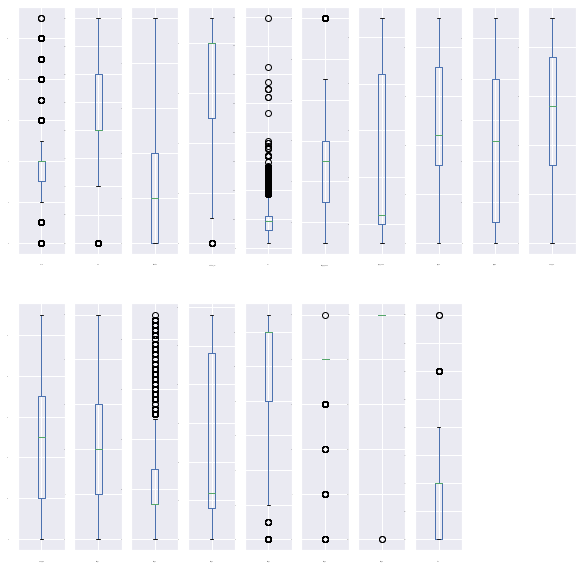

In [257]:
df.plot(kind="box",subplots=True,layout=(2,10),sharex=False,legend=False,fontsize=1,figsize=(10,10))
plt.show()

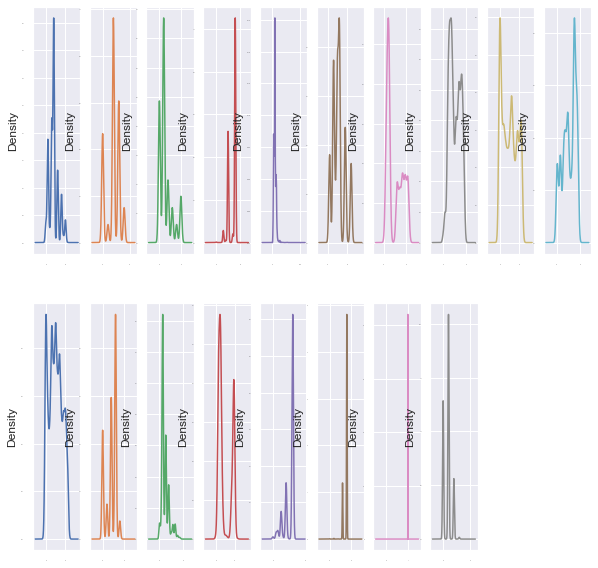

In [258]:
df.plot(kind="density",subplots=True,layout=(2,10),sharex=False,legend=False,fontsize=1,figsize=(10,10))
plt.show()

In [259]:
x=df.drop("Price",axis=1)
y=df["Price"]

# Data Cleansing

In [260]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
#Removing Outliers using IQR method
df_new=df[~((df < (Q1-1.5*IQR)) | (df> (Q3+1.5*IQR))).any(axis=1)]

In [261]:
df_new.shape

(3801, 20)

In [262]:
loss_percentage=(13354-3801)/13354*100
print(loss_percentage)

71.53661824172532


In [263]:
df.skew()

Airline              0.684457
Source              -0.424151
Destination          1.247893
Additional_Info     -0.886055
Price                2.026457
Month_of_Journey     0.621749
Day_of_Journey       0.389526
Dep_hour             0.109087
Dep_min              0.159397
Arrival_hour        -0.384591
Arrival_min          0.111711
Duration_hour        0.857425
Duration_minute     -0.093691
Route_1             -0.618133
Route_2              1.432096
Route_3              0.609758
Route_4             -1.417282
Route_5             -2.363762
Route_6            -81.703732
Stops                0.317940
dtype: float64

In [264]:
from sklearn.preprocessing import power_transform
df1=power_transform(x)
df1=pd.DataFrame(df1,columns=x.columns)

In [265]:
df1.skew()

Airline             -0.019927
Source              -0.238236
Destination          0.041213
Additional_Info     -0.598558
Month_of_Journey    -0.027619
Day_of_Journey       0.026388
Dep_hour            -0.104613
Dep_min             -0.362253
Arrival_hour        -0.366820
Arrival_min         -0.349003
Duration_hour       -0.030549
Duration_minute     -0.376074
Route_1             -0.384518
Route_2              0.060038
Route_3              0.046124
Route_4             -0.881747
Route_5              0.740157
Route_6            -81.703732
Stops               -0.059250
dtype: float64

In [266]:
df1["Route_6"]=np.log10(df1["Route_6"])

In [267]:
df1.skew()

Airline            -0.019927
Source             -0.238236
Destination         0.041213
Additional_Info    -0.598558
Month_of_Journey   -0.027619
Day_of_Journey      0.026388
Dep_hour           -0.104613
Dep_min            -0.362253
Arrival_hour       -0.366820
Arrival_min        -0.349003
Duration_hour      -0.030549
Duration_minute    -0.376074
Route_1            -0.384518
Route_2             0.060038
Route_3             0.046124
Route_4            -0.881747
Route_5             0.740157
Route_6             0.000000
Stops              -0.059250
dtype: float64

In [268]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [269]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=97)

In [270]:
print(x_train.shape,x_test.shape)

(9347, 19) (4007, 19)


In [271]:
print(y_train.shape,y_test.shape)

(9347,) (4007,)


In [272]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score

In [273]:
LR=LinearRegression()
KNR=KNeighborsRegressor()
DTR=DecisionTreeRegressor(random_state=97)
ABR=AdaBoostRegressor(random_state=97)
RFR=RandomForestRegressor(random_state=97)
GBR=GradientBoostingRegressor(random_state=97)

In [274]:
models=[]
models.append(('LinearRegression',LR))
models.append(('DecisionTreeRegressor',DTR))
#models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))

In [275]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
for name,model in models:
    print('*********************************',name,'*********************************')
    print('\n',model)
    Model.append(name)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pre)
    print("Mean_Squared_Error =",mse)
    MSE.append(round(mse,3))
    score= cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(score)
    print('\n')

********************************* LinearRegression *********************************

 LinearRegression()
R2_score =  0.3810711160500382
Mean_Squared_Error = 10669628.05094827
Cross_Val_Score =  -4.536400114257402e+29


********************************* DecisionTreeRegressor *********************************

 DecisionTreeRegressor(random_state=97)
R2_score =  0.7840778354850332
Mean_Squared_Error = 3722251.85004714
Cross_Val_Score =  -5.915958216662124e+27


********************************* AdaBoostRegressor *********************************

 AdaBoostRegressor(random_state=97)
R2_score =  0.32898971006118227
Mean_Squared_Error = 11567452.089673286
Cross_Val_Score =  -3.169685078478482e+29


********************************* RandomForestRegressor *********************************

 RandomForestRegressor(random_state=97)
R2_score =  0.8797745860960556
Mean_Squared_Error = 2072549.0147428592
Cross_Val_Score =  -1.303748976638564e+28


********************************* GradientBoostingR

In [277]:
import joblib
joblib.dump(RFR,"abalone.pkl")

['abalone.pkl']